# 问题：怎么结果是一张全黑的图，答：out_ds的data就是9个分类，即0-8，而0对应的颜色是黑色，所以只有一些淡淡的轮廓。  
问题：这个代码是在干嘛？答：K-means clustering with Spectral Python  
问题：他这是做什么分类？答：把像素进行无监督分类。

In [ ]:
import os 
import spectral 
from osgeo import gdal
import ospybook as pb
folder = r'D:\Projects\VsCode\Python\img_processing_system\osgeopy-data\Landsat\Utah' 
raster_fns =  ['LE70380322000181EDC02_60m.tif', 'LE70380322000181EDC02_TIR_60m.tif']
out_fn = 'kmeans_prediction_60m2.tif'
os.chdir(folder)
data = pb.stack_bands(raster_fns) 

classes, centers = spectral.kmeans(data)

ds = gdal.Open(raster_fns[0]) 
out_ds = pb.make_raster(ds, out_fn, classes, gdal.GDT_Byte) 
levels = pb.compute_overview_levels(out_ds.GetRasterBand(1)) 
out_ds.BuildOverviews('NEAREST', levels) 
out_ds.FlushCache() 
out_ds.GetRasterBand(1).ComputeStatistics(False)
del out_ds, ds

spectral:INFO: k-means iteration 1 - 9903429 pixels reassigned.
spectral:INFO: k-means iteration 2 - 2151944 pixels reassigned.
spectral:INFO: k-means iteration 3 - 867849 pixels reassigned.
spectral:INFO: k-means iteration 4 - 547027 pixels reassigned.
spectral:INFO: k-means iteration 5 - 325501 pixels reassigned.
spectral:INFO: k-means iteration 6 - 214849 pixels reassigned.
spectral:INFO: k-means iteration 7 - 174003 pixels reassigned.
spectral:INFO: k-means iteration 8 - 147331 pixels reassigned.
spectral:INFO: k-means iteration 9 - 139681 pixels reassigned.
spectral:INFO: k-means iteration 10 - 132859 pixels reassigned.
spectral:INFO: k-means iteration 11 - 123494 pixels reassigned.
spectral:INFO: k-means iteration 12 - 113834 pixels reassigned.
spectral:INFO: k-means iteration 13 - 105887 pixels reassigned.
spectral:INFO: k-means iteration 14 - 102579 pixels reassigned.
spectral:INFO: k-means iteration 15 - 105211 pixels reassigned.
spectral:INFO: k-means iteration 16 - 113352 pi

In [ ]:
import os 
import spectral 
import matplotlib.pyplot as plt
import numpy as np

from osgeo import gdal
import ospybook as pb

folder = r'D:\Projects\VsCode\Python\img_processing_system\osgeopy-data\Landsat\Utah' 
raster_fns =  ['LE70380322000181EDC02_60m.tif', 'LE70380322000181EDC02_TIR_60m.tif']
out_fn = 'kmeans_prediction_60m2.tif'
os.chdir(folder)
data = pb.stack_bands(raster_fns) 

classes, centers = spectral.kmeans(data)

ds = gdal.Open(raster_fns[0]) 
# 使用差别很大的不同颜色来表示不同分类的像素点，并存储为dataset
# 生成一个彩色调色板，每个类别一个颜色
num_classes = np.max(classes) + 1
colors = plt.cm.get_cmap('tab10', num_classes)

# 创建RGB图像，每个像素根据类别赋予不同颜色
rgb_img = (colors(classes / num_classes)[..., :3] * 255).astype(np.uint8)

# 创建一个新的dataset用于保存RGB结果
driver = gdal.GetDriverByName('GTiff')
out_ds = driver.Create('kmeans_rgb_result.tif', ds.RasterXSize, ds.RasterYSize, 3, gdal.GDT_Byte)
for i in range(3):
    out_ds.GetRasterBand(i + 1).WriteArray(rgb_img[..., i])
out_ds.SetGeoTransform(ds.GetGeoTransform())
out_ds.SetProjection(ds.GetProjection())
levels = pb.compute_overview_levels(out_ds.GetRasterBand(1)) 
out_ds.BuildOverviews('NEAREST', levels) 
out_ds.FlushCache() 
out_ds.GetRasterBand(1).ComputeStatistics(False)
del out_ds, ds

spectral:INFO: k-means iteration 1 - 9903429 pixels reassigned.
spectral:INFO: k-means iteration 2 - 2151944 pixels reassigned.
spectral:INFO: k-means iteration 3 - 867849 pixels reassigned.
spectral:INFO: k-means iteration 4 - 547027 pixels reassigned.
spectral:INFO: k-means iteration 5 - 325501 pixels reassigned.
spectral:INFO: k-means iteration 6 - 214849 pixels reassigned.
spectral:INFO: k-means iteration 7 - 174003 pixels reassigned.
spectral:INFO: k-means iteration 8 - 147331 pixels reassigned.
spectral:INFO: k-means iteration 9 - 139681 pixels reassigned.
spectral:INFO: k-means iteration 10 - 132859 pixels reassigned.
spectral:INFO: k-means iteration 11 - 123494 pixels reassigned.
spectral:INFO: k-means iteration 12 - 113834 pixels reassigned.
spectral:INFO: k-means iteration 13 - 105887 pixels reassigned.
spectral:INFO: k-means iteration 14 - 102579 pixels reassigned.
spectral:INFO: k-means iteration 15 - 105211 pixels reassigned.
spectral:INFO: k-means iteration 16 - 113352 pi

In [5]:
dataset1 = gdal.Open('LE70380322000181EDC02_60m.tif')
dataset2 = gdal.Open('LE70380322000181EDC02_TIR_60m.tif')

# 获取波段数量
band_count = dataset1.RasterCount + dataset2.RasterCount
print("dataset1.RasterCount: ", dataset1.RasterCount)
print("dataset2.RasterCount: ", dataset2.RasterCount)

dataset1.RasterCount:  3
dataset2.RasterCount:  1


In [6]:
print(data.shape)
print(classes.shape)

(3631, 3996, 4)
(3631, 3996)


C:\Users\31204\AppData\Local\Temp\ipykernel_10000\2119040372.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', num_classes)
d:\Projects\VsCode\Python\img_processing_system\.conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Projects\VsCode\Python\img_processing_system\.conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Projects\VsCode\Python\img_processing_system\.conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) 

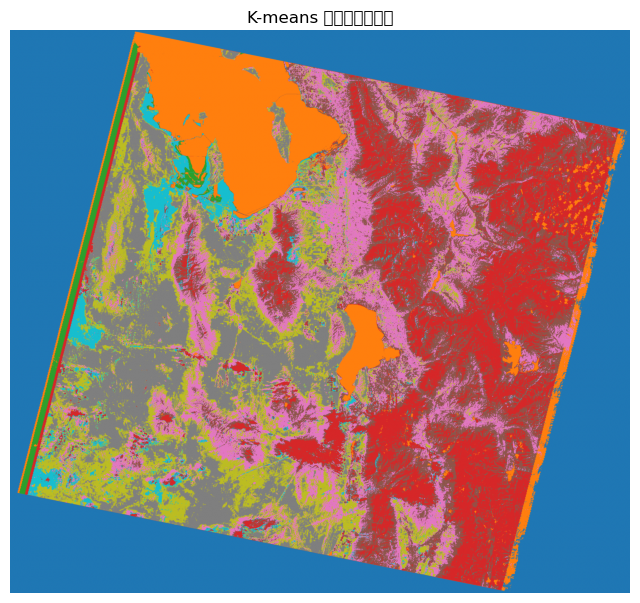

In [8]:
# 由于classes的取值代表像素点的分类，如何使用差别很大的不同颜色来表示这些不同分类的像素点？
import matplotlib.pyplot as plt
import numpy as np
# 生成一个彩色调色板，每个类别一个颜色
num_classes = np.max(classes) + 1
colors = plt.cm.get_cmap('tab10', num_classes)

# 创建RGB图像
rgb_img = colors(classes / num_classes)[..., :3]  # 归一化并去掉alpha通道

plt.figure(figsize=(8, 8))
plt.imshow(rgb_img)
plt.title("K-means 分类结果可视化")
plt.axis('off')
plt.show()

# 版本2：自己写的

## 数据准备

In [1]:
import numpy as np
from osgeo import gdal
training_raster_fn = r"D:\Download\HRSCD\images_2012\2012\D14\14-2012-0445-6920-LA93-0M50-E080.tif"
ds_train = gdal.Open(training_raster_fn)
if ds_train is None:
    raise IOError(f"无法打开训练影像: {training_raster_fn}")
rows = ds_train.RasterYSize
cols = ds_train.RasterXSize
if ds_train.RasterCount < 3:
    raise ValueError("训练影像波段数少于3，请检查 training_raster_fn")

# 读取前三个波段并堆叠为 (rows, cols, 3)
b1 = ds_train.GetRasterBand(1).ReadAsArray()
b2 = ds_train.GetRasterBand(2).ReadAsArray()
b3 = ds_train.GetRasterBand(3).ReadAsArray()
stack = np.dstack((b1, b2, b3))  # shape = (rows, cols, 3)

# 重塑为 (n, 3)
X = stack.reshape((rows * cols, 3))
print(rows, cols)
del ds_train

10000 10000


## 模型训练

In [ ]:
from sklearn.cluster import KMeans
# kmeans_clf  = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(X)
kmeans_clf  = KMeans(n_clusters=5, random_state=0, n_init=10).fit(X) # 当n_init=10时，模型表现很差

print(kmeans_clf.labels_)

Exception in thread Thread-4 (_readerthread):
Traceback (most recent call last):
  File "d:\Projects\VsCode\Python\img_processing_system\.conda\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "d:\Projects\VsCode\Python\img_processing_system\.conda\Lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "d:\Projects\VsCode\Python\img_processing_system\.conda\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "d:\Projects\VsCode\Python\img_processing_system\.conda\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 4: invalid continuation byte


[3 2 2 ... 4 4 4]


## 保存模型

In [3]:
import joblib
joblib.dump(kmeans_clf, r".\pkl\k_means_model.pkl")

['.\\pkl\\k_means_model.pkl']

In [ ]:
print(np.unique(kmeans_clf.labels_))

[0 1 2 3 4]


## 预测新图片

In [5]:
new_img_fn = r"D:\Download\HRSCD\images_2012\2012\D14\14-2012-0415-6890-LA93-0M50-E080.tif"

dst_file = r'D:\Projects\VsCode\Python\img_processing_system\tmp\subset_14-2012-0415-6890-LA93-0M50-E080.tif'

# new_img_fn太大了，预测会花费太长时间，因此，裁剪一部分用作预测
ds = gdal.Translate(
    dst_file,
    new_img_fn,
    srcWin=[3000, 1000, 1000, 1000]  # x_offset, y_offset, width, height
)
del ds

new_img_ds = gdal.Open(dst_file)
rows = new_img_ds.RasterYSize
cols = new_img_ds.RasterXSize

b1 = new_img_ds.GetRasterBand(1).ReadAsArray()
b2 = new_img_ds.GetRasterBand(2).ReadAsArray()
b3 = new_img_ds.GetRasterBand(3).ReadAsArray()
stack = np.dstack((b1, b2, b3))  # shape = (rows, cols, 3)
new_img_X = stack.reshape((rows * cols, 3))

pred_result = kmeans_clf.predict(new_img_X)
prediction_matrix = np.reshape(pred_result, (rows, cols)) + 1 # +1 为了与原分类保持一致，即1: Artificial surfaces -> 红

driver = gdal.GetDriverByName('gtiff') 
predict_ds = driver.Create(r"D:\Projects\VsCode\Python\img_processing_system\tmp\k_means_prediction_result.tif", cols, rows) 
predict_ds.SetProjection(new_img_ds.GetProjection()) 
predict_ds.SetGeoTransform(new_img_ds.GetGeoTransform())
band = predict_ds.GetRasterBand(1)
band.WriteArray(prediction_matrix)
band.FlushCache() 
del new_img_ds

## 构建colortable

In [6]:
ct = gdal.ColorTable()

ct.SetColorEntry(1, (255, 0, 0, 255))     # 1: Artificial surfaces -> 红
ct.SetColorEntry(2, (255, 255, 0, 255))   # 2: Agricultural areas -> 黄
ct.SetColorEntry(3, (0, 128, 0, 255))     # 3: Forests -> 绿
ct.SetColorEntry(4, (0, 160, 160, 255))   # 4: Wetlands -> 青/绿蓝
ct.SetColorEntry(5, (0, 0, 255, 255))     # 5: Water -> 蓝


predict_ds.GetRasterBand(1).SetRasterColorTable(ct) 
del predict_ds